#### Реализация метода Эйлера для численного решения ДУ

$T y'(t) + y(t) = k u(t) $

Со входным сигналом $u(t) = \theta (t - \tau)$

На отрезке $[t_0, t_1]$ и шагом $Δ t$

Параметры:

$T = 0.25 $ с

$k = 1$

$\tau = 0.2$ с

$t_0 = 0$ c

$t_1 = 2$ c

$Δ t = 0.05$ с

Перепишем уравнение, оставив в левой части только первую производную

$y'(t) = -\frac{1}{T} y(t) + \frac{k}{T} u(t)$

Начальное условие:

$y|_{t=0} = 0$

Шаг метода:

$y(t_{k+1}) ≈ y(t_k) + y'(t_k) Δ t = y(t_k)(1 - \frac{Δt}{T}) + \frac{kΔt}{T} \theta(t - \tau)$

In [ ]:
# Инициализация параметров
T = 0.25
_k = 1
tau = 0.2
t0 = 0
t1 = 2
dt = 0.05

In [ ]:
# Реализация метода
import numpy as np

def euler_method(t):
  euler = []
  for k, tk in enumerate(t):
    if k==0:
      euler.append(0.0)
    else:
      euler.append(euler[k-1] + dt * ( -euler[k-1]/T + _k/T * np.heaviside(tk - tau, 0)))
  return euler

In [ ]:
t = np.arange(t0, t1+dt, dt, dtype=np.float64)
y_euler = euler_method(t)

Переходная функция для данного звена известна:

$h(t) = k \left(1 - e^{-\frac{t - \tau}{T}}\right) \theta(t - \tau)$

Можем сравнить оцененное по методу Эйлера решение с точным

In [ ]:
y = _k * (1 - np.exp(-(t - tau)/T))*np.heaviside(t - tau, 0)

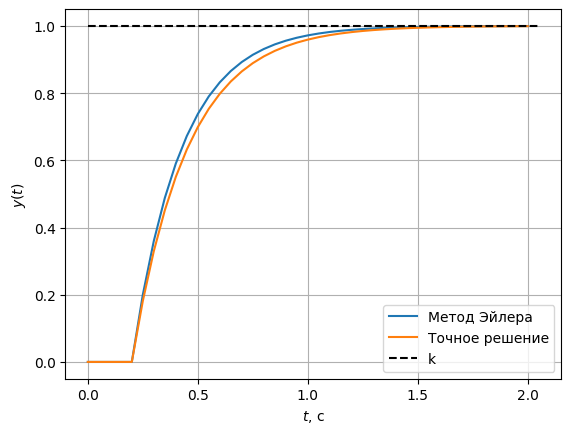

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t, y_euler, label = 'Метод Эйлера')
plt.plot(t, y, label = 'Точное решение')
plt.hlines(_k, xmin=t0, xmax=t1+dt, label='k', linestyles='dashed', color='black')
plt.xlabel(r'$t$' + ', c')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Можем посмотреть, как убывает абсолютная ошибка
err = np.abs(y - y_euler)
y_second_deriative = np.abs(_k/T * np.exp(-(t - tau)/T) * np.heaviside(t - tau, 0))

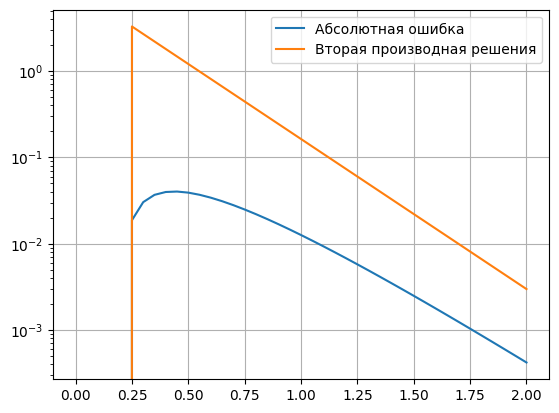

In [ ]:
plt.plot(t, err, label = 'Абсолютная ошибка')
plt.plot(t, y_second_deriative, label = 'Вторая производная решения')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

<ipython-input-77-3c0c0c58486f>:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(t, err/y_second_deriative)


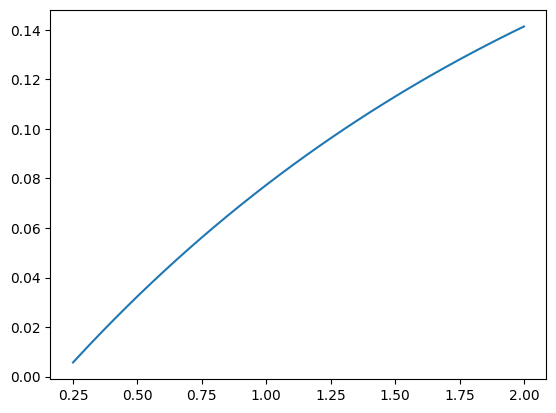

In [ ]:
plt.plot(t, err/y_second_deriative)
plt.show()